# 0: Accessing data (via Google Drive)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Read in raw data from GDrive to working environment; check our data
!cp -r /content/drive/MyDrive/store_sales_data/ ./data
!ls data

clean  raw


In [3]:
!ls data/raw

holidays_events.csv  sample_submission.csv  test.csv   transactions.csv
oil.csv		     stores.csv		    train.csv


In [4]:
!ls data/clean

holidays_events_cat_meta.json  main.parquet	  stores_cat_meta.json
holidays_events.parquet        oil_cat_meta.json  stores.parquet
main_cat_meta.json	       oil.parquet


# 1: Inspecting raw data

## Read in raw data

In [5]:
# Read in raw data

import os
import pandas as pd

raw_data_path = "data/raw"

# Store df's in a dictionary
raw_dfs = {}
raw_dfs['holidays_events'] = pd.read_csv(os.path.join(raw_data_path, "holidays_events.csv"))
raw_dfs['oil'] = pd.read_csv(os.path.join(raw_data_path, "oil.csv"))
raw_dfs['stores'] = pd.read_csv(os.path.join(raw_data_path, "stores.csv"))
raw_dfs['train'] = pd.read_csv(os.path.join(raw_data_path, "train.csv"))
raw_dfs['test'] = pd.read_csv(os.path.join(raw_data_path, "test.csv"))

We have a normalized setup of our data

## Basic inspection of data

In [6]:
# Check out high-level info of our df's
def inspect_df(df_name, df):
    print(f" * {df_name}.dtypes: \n{df.dtypes}")
    print(f" * {df_name}.isnull().sum(): \n{df.isnull().sum()}")
    print(f" * {df_name}.shape: {df.shape}")
    print(f" * {df_name}.nunique() : \n{df.nunique()}")

for i, df_name in enumerate(raw_dfs):
    print(f"\n#### {i+1}/{len(raw_dfs)}: {df_name} ####")
    df = raw_dfs[df_name]
    inspect_df(df_name, df)


#### 1/5: holidays_events ####
 * holidays_events.dtypes: 
date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object
 * holidays_events.isnull().sum(): 
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
 * holidays_events.shape: (350, 6)
 * holidays_events.nunique() : 
date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

#### 2/5: oil ####
 * oil.dtypes: 
date           object
dcoilwtico    float64
dtype: object
 * oil.isnull().sum(): 
date           0
dcoilwtico    43
dtype: int64
 * oil.shape: (1218, 2)
 * oil.nunique() : 
date          1218
dcoilwtico     998
dtype: int64

#### 3/5: stores ####
 * stores.dtypes: 
store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object
 * stores.isnull().sum(): 
store_

What we deduce from above:
* Basically no N/A's, only in oil
* No duplicate rows

In [7]:
# Get a better idea of what our data looks like
for i, df_name in enumerate(raw_dfs):
    print(f"\n#### {i+1}/{len(raw_dfs)}: {df_name} ####")
    df = raw_dfs[df_name]

    print(df.head())


#### 1/5: holidays_events ####
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  

#### 2/5: oil ####
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

#### 3/5: stores ####
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                 

## Diagnosis:
* Aren't any duplicate rows
* Only N/A's in 'oil' (will deal with later)
* *Mainly want to set types*
    * Change type of 'date' to pd.datetime
    * Change (other) object types to 'category'


# IN PIPELINE NOTEBOOK: CLEAN DATA

# 2: Inspecting Clean Data

## Visualization of features

In [8]:
# Read in clean data

clean_data_path = "data/clean"

# Store df's in a dictionary
clean_dfs = {}
clean_dfs['holidays_events'] = pd.read_parquet(os.path.join(clean_data_path, "holidays_events.parquet"))
clean_dfs['oil'] = pd.read_parquet(os.path.join(clean_data_path, "oil.parquet"))
clean_dfs['stores'] = pd.read_parquet(os.path.join(clean_data_path, "stores.parquet"))
clean_dfs['main'] = pd.read_parquet(os.path.join(clean_data_path, "main.parquet"))

In [9]:
for i, df_name in enumerate(clean_dfs):
    print(f"\n#### {i+1}/{len(clean_dfs)}: {df_name} ####")
    df = clean_dfs[df_name]
    inspect_df(df_name, df)


#### 1/4: holidays_events ####
 * holidays_events.dtypes: 
date                                                               datetime64[ns]
combo_('Local', 'Ambato', 'Holiday')                                        int64
combo_('Local', 'Cayambe', 'Holiday')                                       int64
combo_('Local', 'Cuenca', 'Holiday')                                        int64
combo_('Local', 'El Carmen', 'Holiday')                                     int64
combo_('Local', 'Esmeraldas', 'Holiday')                                    int64
combo_('Local', 'Guaranda', 'Holiday')                                      int64
combo_('Local', 'Guayaquil', 'Additional')                                  int64
combo_('Local', 'Guayaquil', 'Holiday')                                     int64
combo_('Local', 'Ibarra', 'Holiday')                                        int64
combo_('Local', 'Latacunga', 'Holiday')                                     int64
combo_('Local', 'Libertad', 'Holiday')


#### 1/4: holidays_events ####
Histograms of numerical data: 


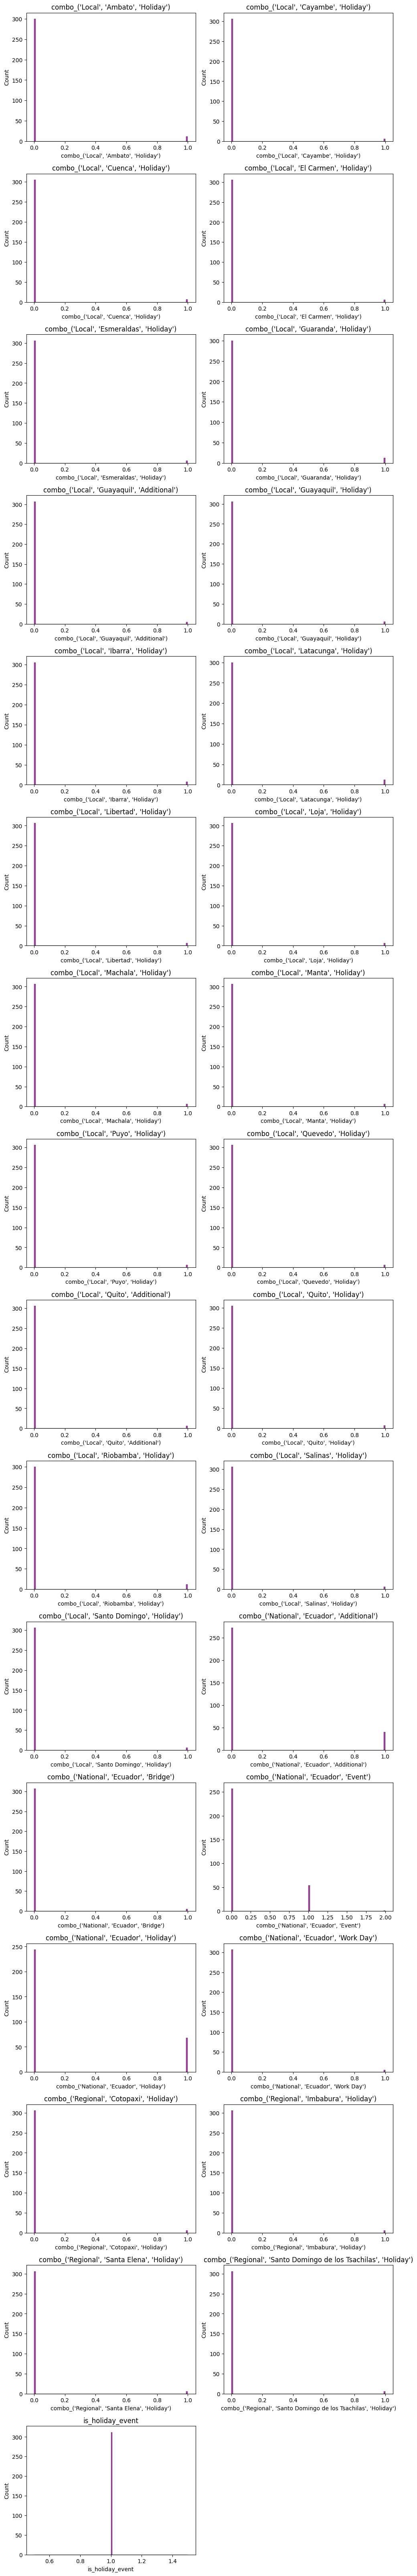

Barplots of categorical data: 


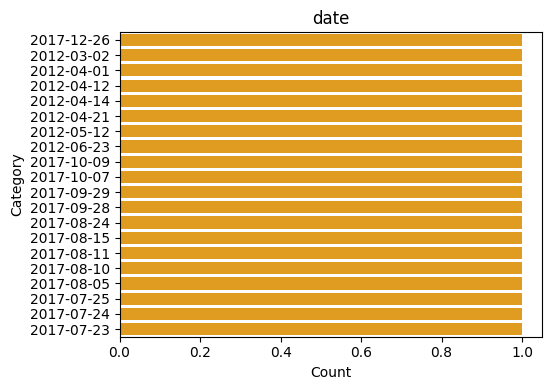


#### 2/4: oil ####
Histograms of numerical data: 


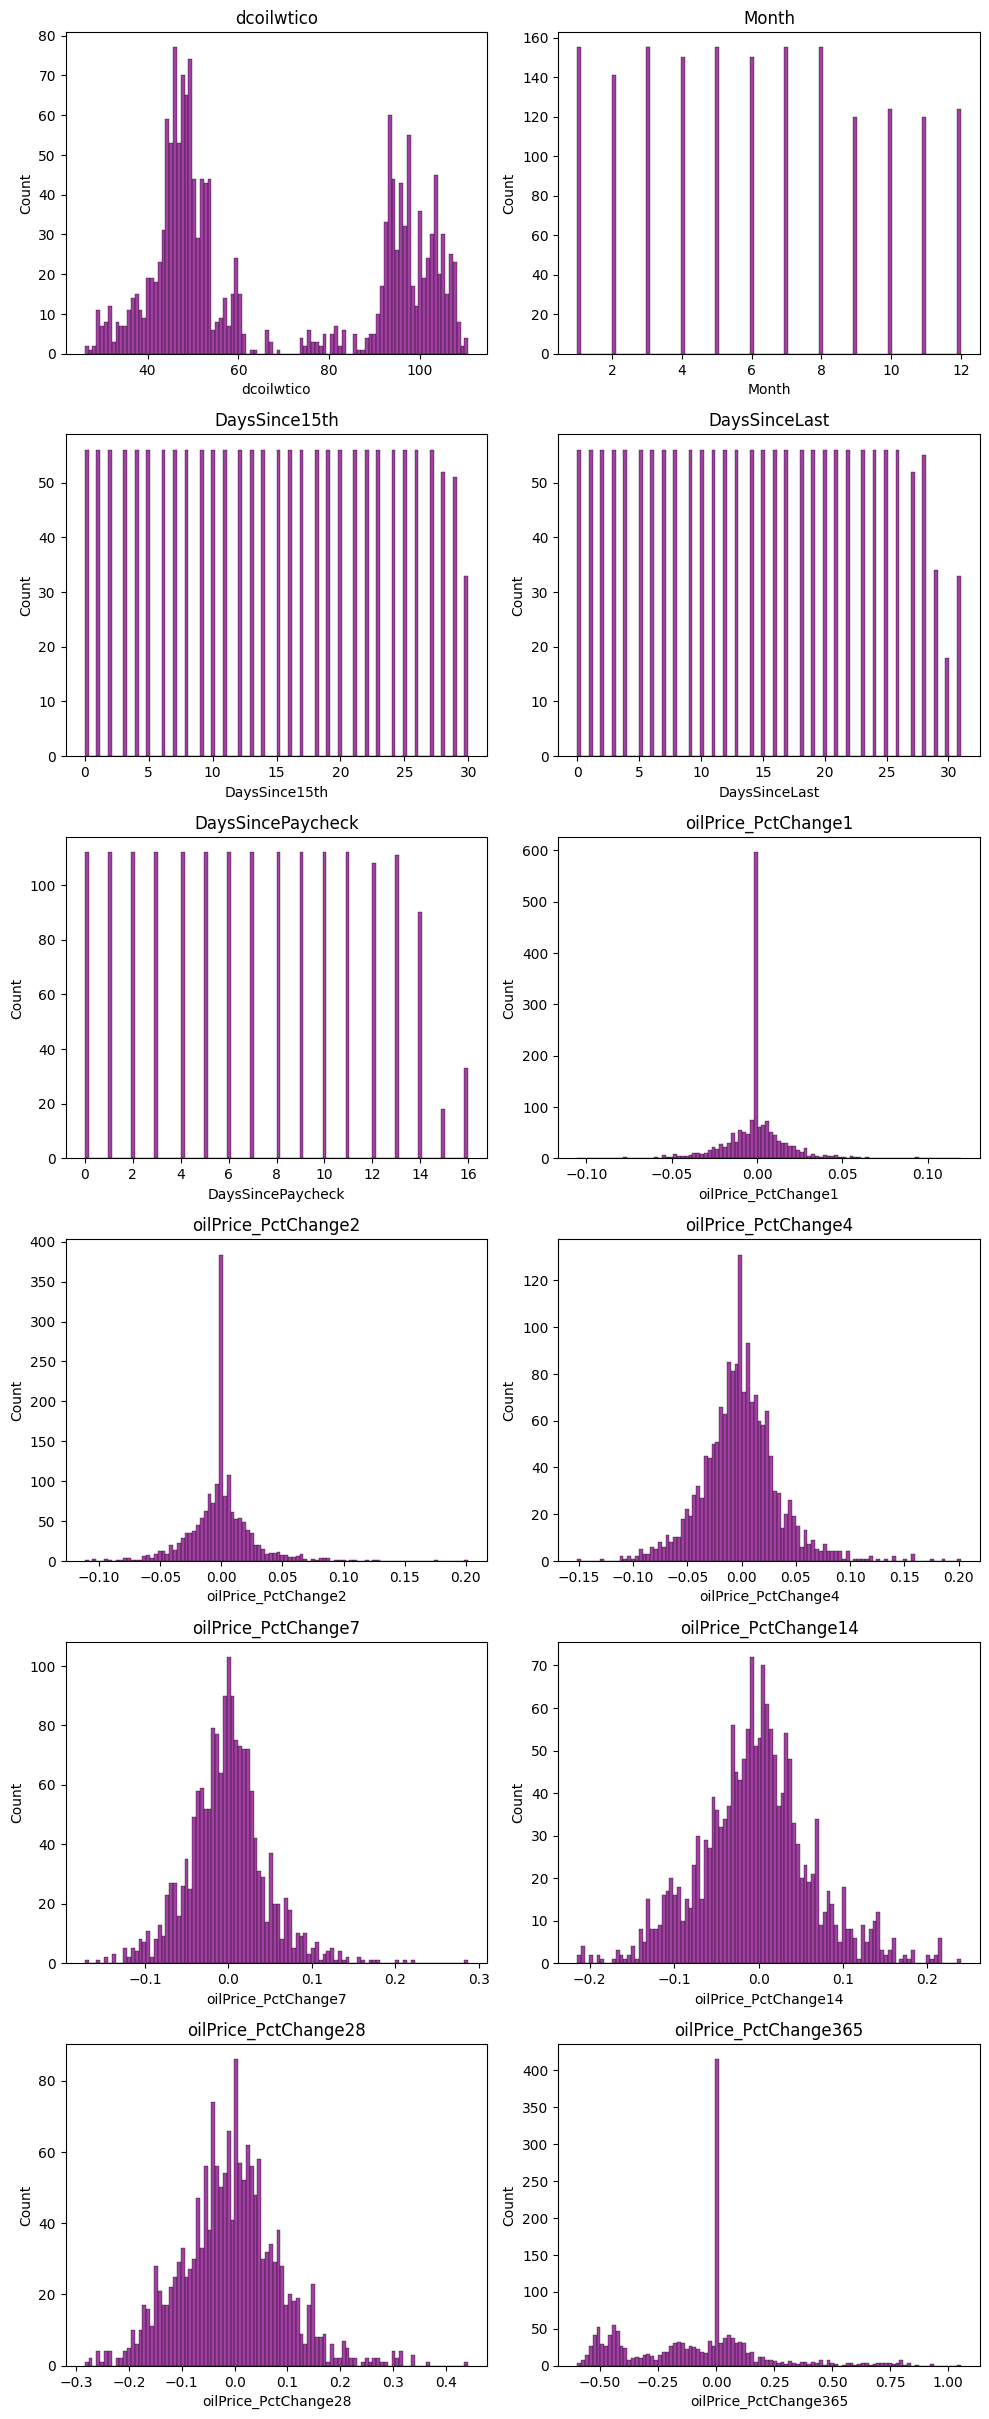

Barplots of categorical data: 


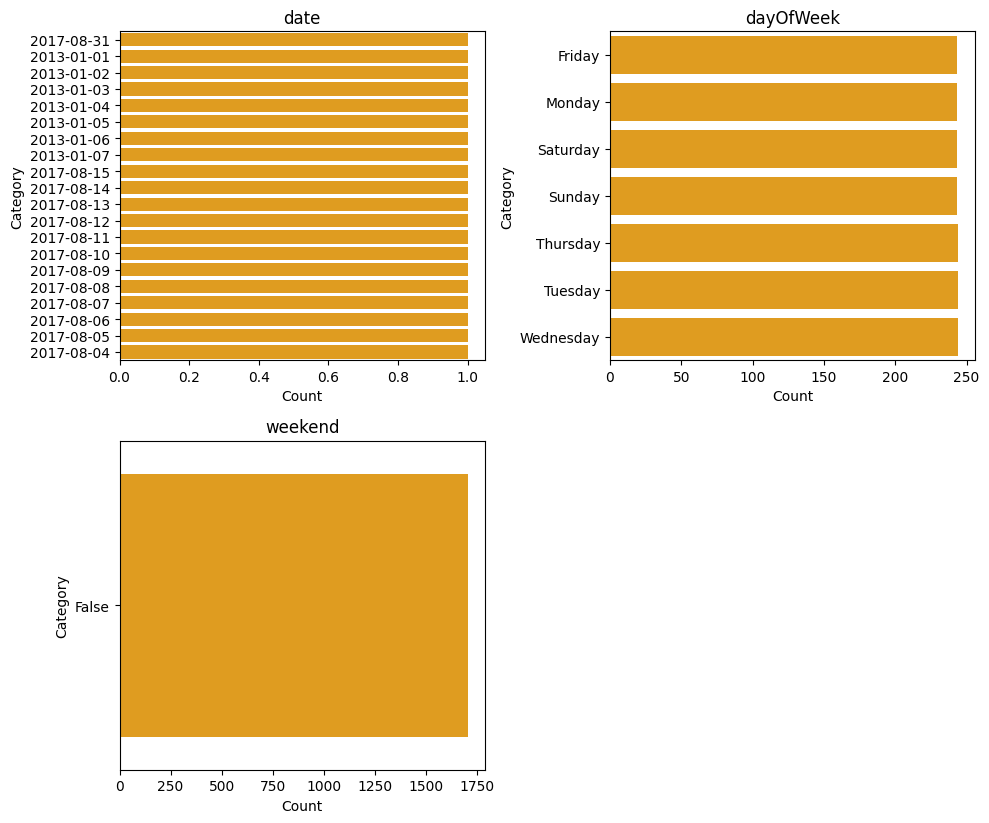


#### 3/4: stores ####
Histograms of numerical data: 


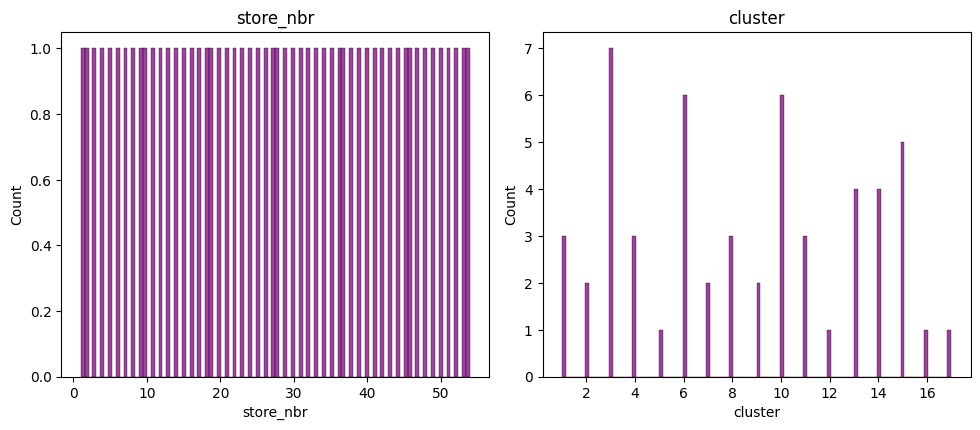

Barplots of categorical data: 


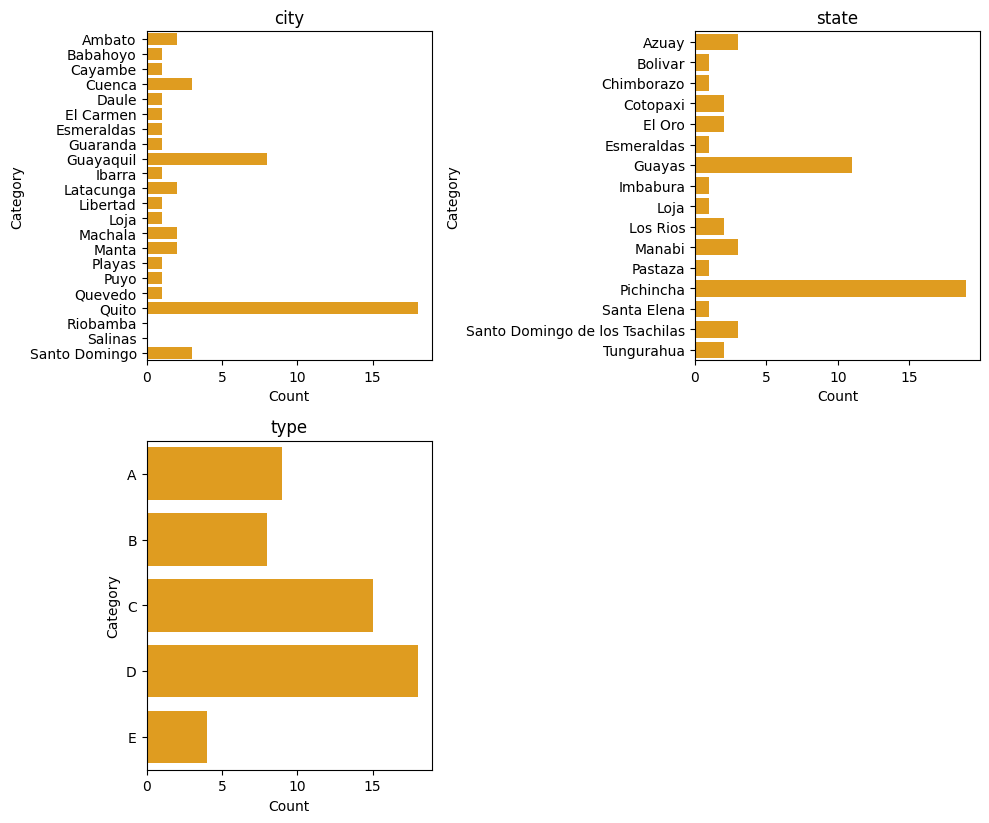


#### 4/4: main ####
Histograms of numerical data: 


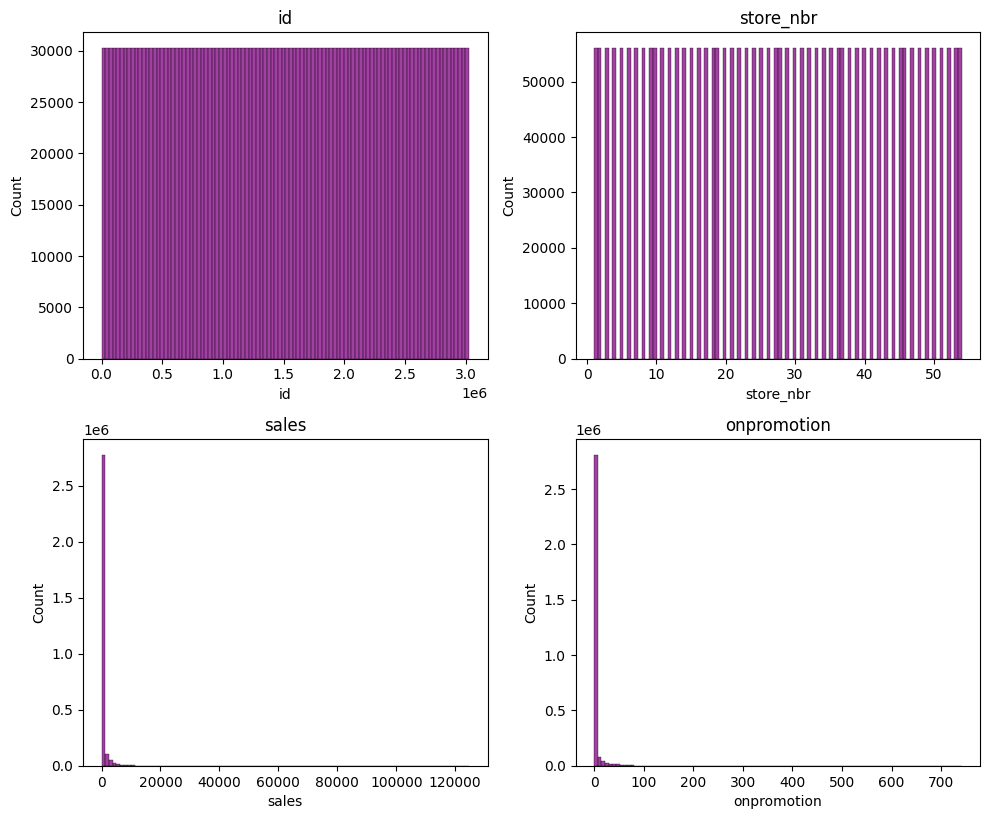

Barplots of categorical data: 


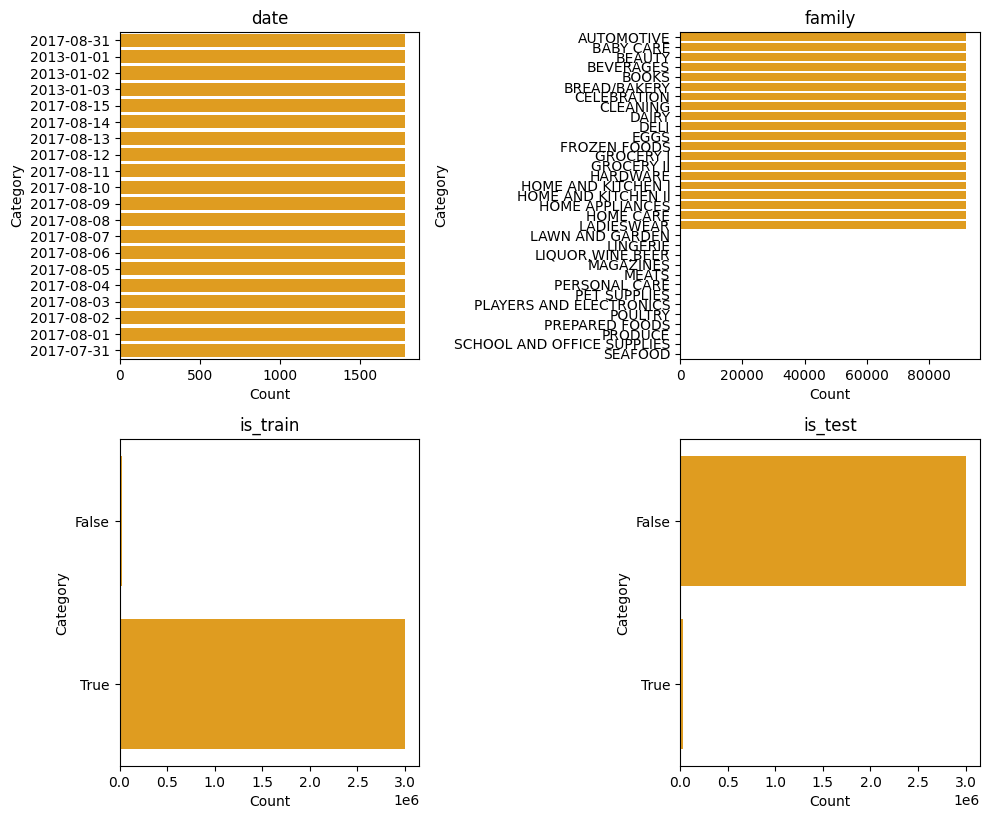

In [10]:
# Univariate visualizations

# Make histogram of each numerical column
# Make bar plot of each categorical column
import seaborn as sns
import matplotlib.pyplot as plt


def make_histograms(df_name, df):
    numeric_cols = df.select_dtypes(include='number').columns

    # Set up the layout
    n_rows = len(numeric_cols)
    plt.figure(figsize=(10, 4 * n_rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 2, i)
        sns.histplot(df[col].dropna(), bins=100, color='purple')
        plt.title(col)

    plt.tight_layout()
    plt.show()


def make_barplots(df_name, df):
    object_cols = df.select_dtypes(exclude='number').columns
    n_rows = len(object_cols)
    plt.figure(figsize=(10, 4 * n_rows))

    for i, col in enumerate(object_cols, 1):
        plt.subplot(n_rows, 2, i)
        counts = df[col].value_counts().head(20)  # top 20 categories
        sns.barplot(x=counts.values, y=counts.index, orient='h', color='orange')
        plt.title(col)
        plt.xlabel("Count")
        plt.ylabel("Category")

    plt.tight_layout()
    plt.show()


for i, df_name in enumerate(clean_dfs):
    print(f"\n#### {i+1}/{len(clean_dfs)}: {df_name} ####")
    df = clean_dfs[df_name]

    print(f"Histograms of numerical data: ")
    make_histograms(df_name, df)
    print(f"Barplots of categorical data: ")
    make_barplots(df_name, df)

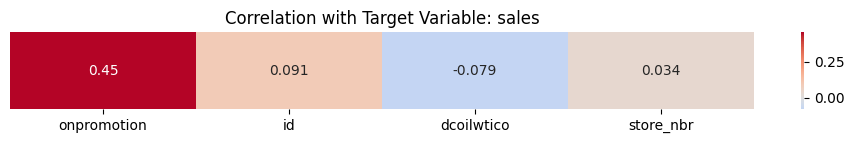

In [ ]:
# Heat map against the target variable
def corr_heatmap_against_target(df, target_col='sales'):
    # Compute correlations with the target variable
    correlation = df.corr(numeric_only=True)[target_col].drop(target_col)
    correlation = correlation.reindex(correlation.abs().sort_values(ascending=False).index)

    # Convert to DataFrame for seaborn heatmap
    correlation_df = correlation.to_frame().T  # make it a row to heatmap it horizontally

    # Plot the heatmap
    plt.figure(figsize=(12, 1))  # Adjust height to make it thin
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation with Target Variable: {target_col}')
    plt.yticks([])  # optional: hides the y-axis (since it's just one row)
    plt.show()

corr_heatmap_against_target(pd.merge(clean_dfs['train'], raw_dfs['oil'], on='date'))

# None of the other features are numeric!

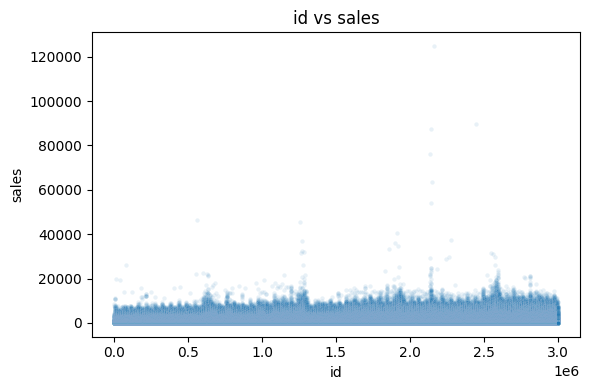

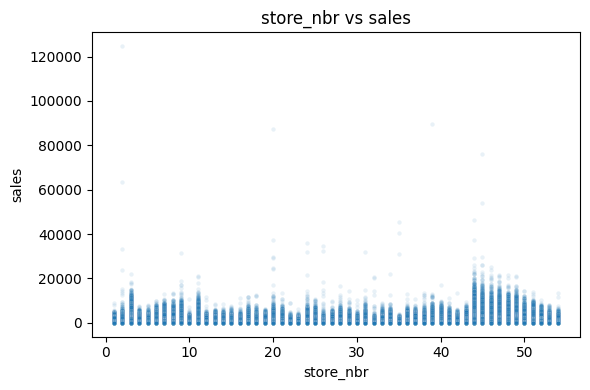

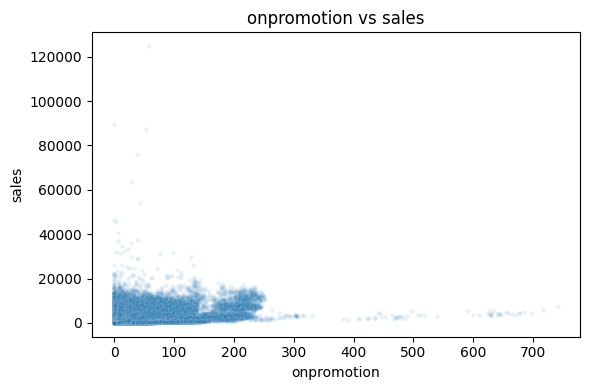

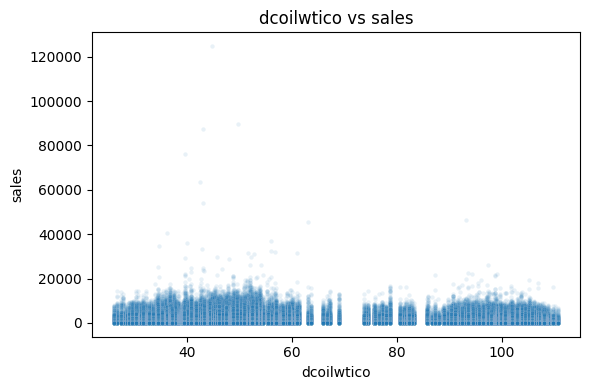

In [ ]:
# Scatter plots of numerical features against target variable
def scatter_plot_against_target(df, target_col='sales'):
    # Loop through each numerical feature
    for col in df.select_dtypes(include='number').columns:
        if col == target_col:
            continue  # skip the target itself

        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=col, y=target_col, alpha=0.1, s=10)
        plt.title(f'{col} vs {target_col}')
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.tight_layout()
        plt.show()

scatter_plot_against_target(pd.merge(raw_dfs['train'], raw_dfs['oil'], on='date'))

* Ensure no duplicate rows

* Missing data/Imputation Strategy:
    * sns.heatmap(df.isnull())
    * Figure out whether to drop or impute

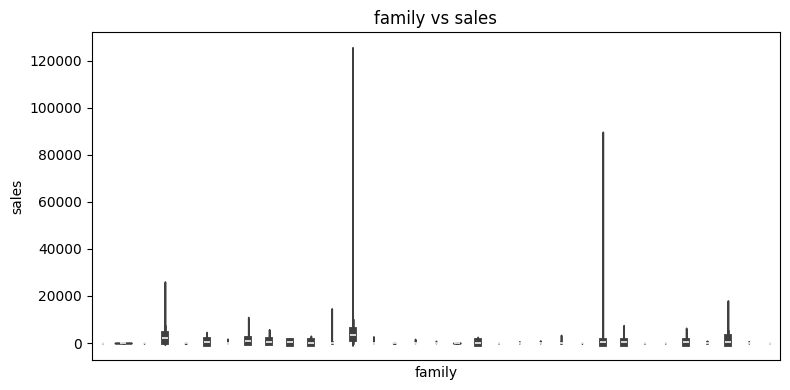

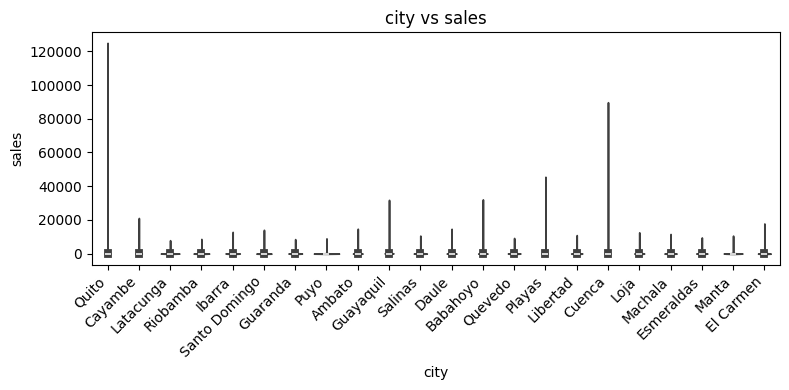

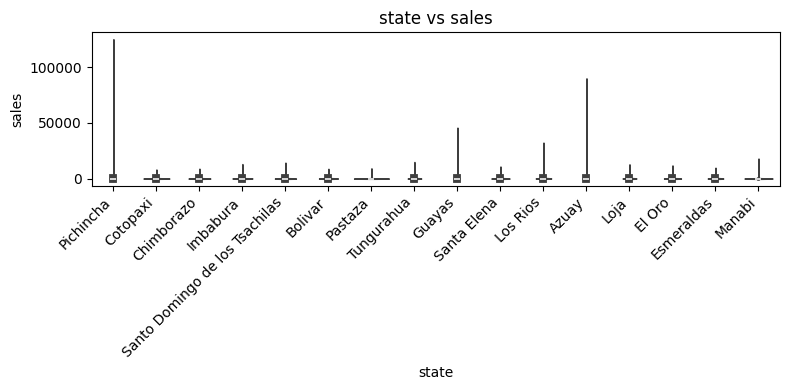

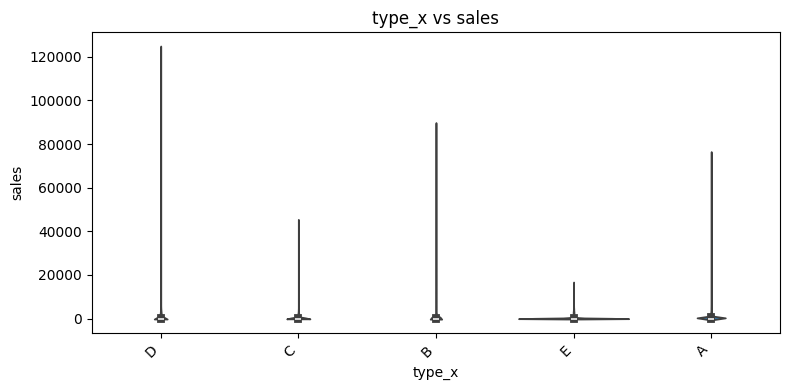

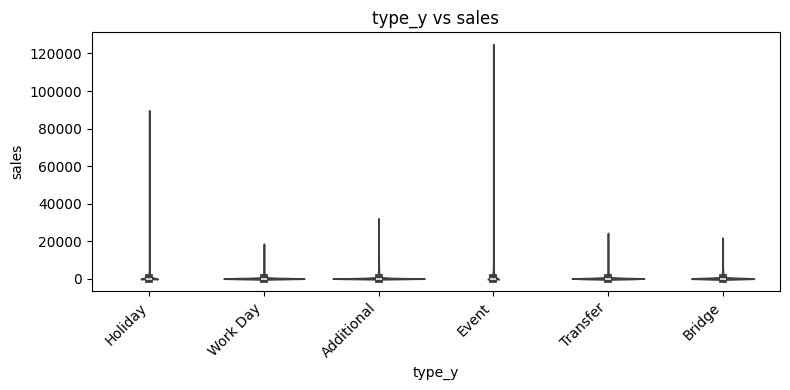

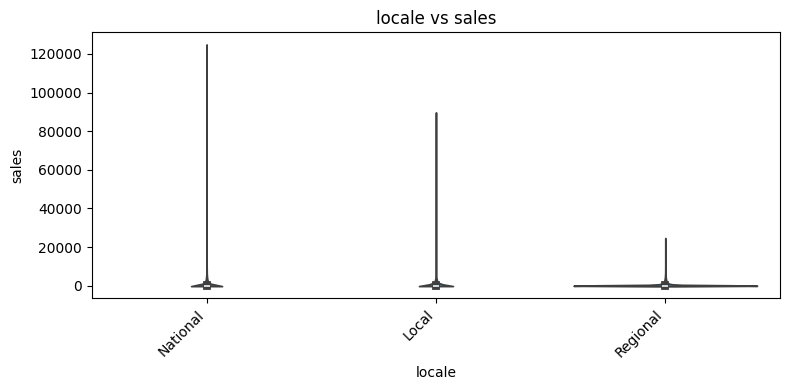

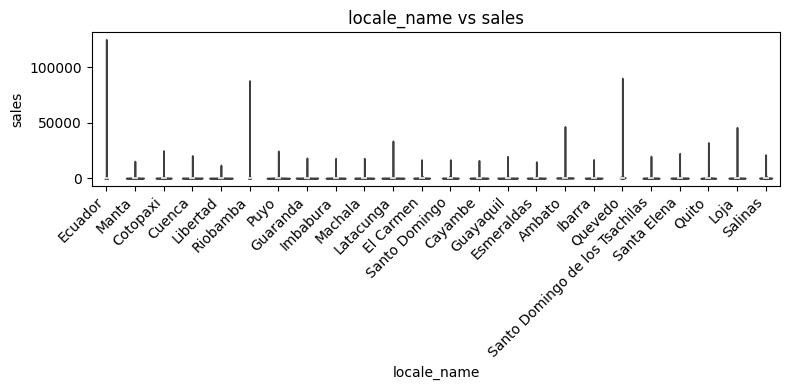

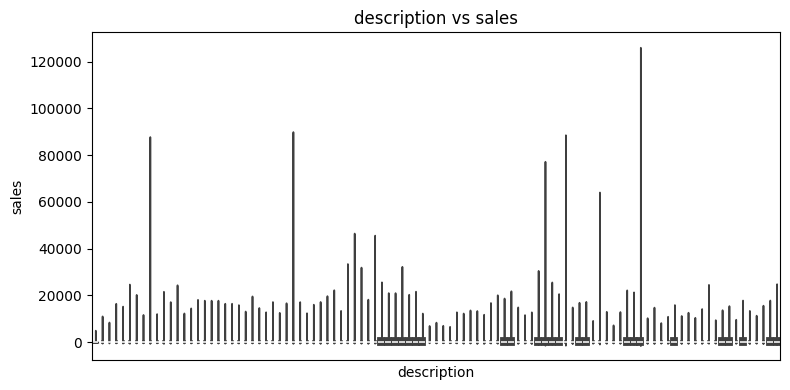

In [ ]:
def boxplot_against_target(df, target_col='sales', max_labels=25):
    # Loop through categorical columns
    for col in df.select_dtypes(include='object').columns:
        num_categories = df[col].nunique()
        plt.figure(figsize=(8, 4))
        sns.violinplot(data=df, x=col, y=target_col)
        plt.title(f'{col} vs {target_col}')
        if num_categories > max_labels:
            plt.xticks([], [])  # completely remove x-axis labels and ticks
        else:
            plt.xticks(rotation=45, ha='right')  # otherwise rotate labels
        plt.tight_layout()
        plt.show()


df = pd.merge(raw_dfs['train'], raw_dfs['stores'], on='store_nbr')
df = pd.merge(df, raw_dfs['holidays_events'], on='date')

boxplot_against_target(df.drop(columns=['date']))

#2: EDA with Clean Data

TODO:

A: Univariate Analysis
* Plot histogram of numerical data
* Plot histogram (bar plot) of categorical data
* Use .describe() to find out what's going on with numerical data
* Identify outliers for numerical data

B: Bivariate Analysis
* Correlation heatmap of numerical data with target
* Scatter plots of numerical data with target
* Boxplot of categorical with target (???)

C: Multivariate Analysis (maybe not)
* Pairplots?
* Dimensionality reduction (PCA, t-SNE)?

D: Data quality checks
* No duplicate rows?
* Inconsistent categories?
* Correct time ranges?
* Out-of-range values?

E: Target Variable Analysis
* Numerical: Distribution? Skew? Outliers?
* Categorical: Class balance?
